## DX799S O1 Data Science Capstone (Summer 1 2025) - Milestone 2 (Weeks 8-11)
### Assignment - Week 9 Jupyter Notebook - Gradient Boost
This notebook shows my Week 9 review of the Home Credit dataset as part of my capstone project on predicting early mortgage delinquency. This notebook uses gradient boosting, tuning learning rate, number of estimators, tree depth, and regularization parameters to improve model performance and support early delinquency prediction for my capstone project in mortgage lending.


Source of data file Home Credit Default Risk: 
- https://www.kaggle.com/competitions/home-credit-default-risk/data?select=HomeCredit_columns_description.csv


### Note for Peer Completing Review

Per Feedback Fruits, please review the following -- Mod C 9.3 Peer Review: Week 9 Jupyter Notebook

As part of your progress toward Milestones One and Two, you will submit work for peer review and provide feedback on a submission by a peer who has selected a different project dataset. The feedback you provide should be based on the rubric below. As you review your peer’s work:  
- Consider each category (row) 
- Select a rating for your peer's work (column) 
- Provide some direct feedback using the comments section — what should be changed or improved? 
- Share what you like about the work — what should they do more of? 

In [59]:
#imports
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    roc_auc_score, average_precision_score, f1_score,
    precision_score, recall_score, precision_recall_curve
)

In [60]:
#load data
df = pd.read_csv("Kaggle_Home_Credit_Default_Risk__train.csv")

#preview data (first few rows)
df.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
### Review data set 

#print all column names
print("columns in the dataset")
print(df.columns.tolist())

columns in the dataset
['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',

In [62]:
#shows shape, previous rows, columns types -- poart of EDA
print("shape", df.shape)
display(df.head(10))
print("\ndtypes")
print(df.dtypes.value_counts())

shape (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN



dtypes
float64    65
int64      41
object     16
Name: count, dtype: int64


In [63]:
#count missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
print("\n columns with missing values, top 10")
print(missing_values.head(10))



 columns with missing values, top 10
COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
NONLIVINGAPARTMENTS_MEDI    213514
FONDKAPREMONT_MODE          210295
LIVINGAPARTMENTS_MODE       210199
LIVINGAPARTMENTS_AVG        210199
LIVINGAPARTMENTS_MEDI       210199
dtype: int64


In [64]:
#view summary stats
print("summary stats")
print(df.describe())

summary stats
          SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    

In [65]:
# build df_clean here so the cell is self-contained
#encountered errors:
#print("shape before cleaning:", df.shape)
#print("shape after cleaning:", df_clean.shape)

#30% missing threshold
missing_pct = df.isna().mean()
keep_cols = missing_pct[missing_pct < 0.30].index
df_clean = df[keep_cols].copy()

#drop ID if present
df_clean = df_clean.drop(columns=['SK_ID_CURR'], errors='ignore')

#target 0/1 and row filter
y_series = pd.to_numeric(df_clean['TARGET'], errors='coerce')
mask = y_series.isin([0, 1])
df_clean = df_clean.loc[mask].copy()
y = y_series.loc[mask].astype(int).values

#numeric features with inf/NaN handled
X = df_clean.drop(columns=['TARGET']).select_dtypes(include='number').copy()
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X = X.fillna(X.median(numeric_only=True))

#drop zero-variance features
nzv = X.columns[X.nunique(dropna=False) <= 1]
if len(nzv):
    X = X.drop(columns=nzv)

print("X shape:", X.shape, "y shape:", y.shape)



X shape: (307511, 59) y shape: (307511,)


In [66]:
#remove zero-variance features - protects CV/trees from bad splits
nzv = X.columns[X.nunique(dropna=False) <= 1]
if len(nzv):
    print("dropping zero-variance cols:", nzv.tolist())
    X = X.drop(columns=nzv)

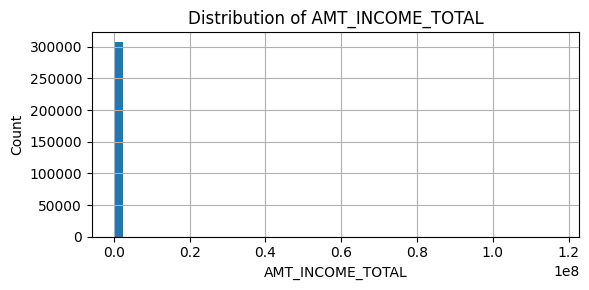

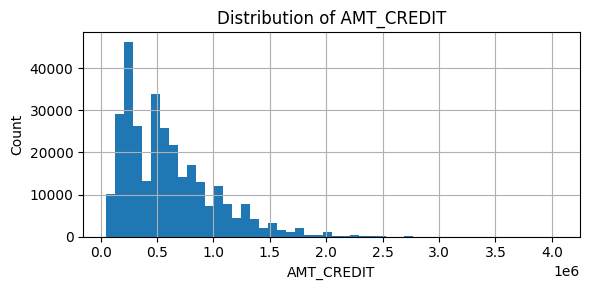

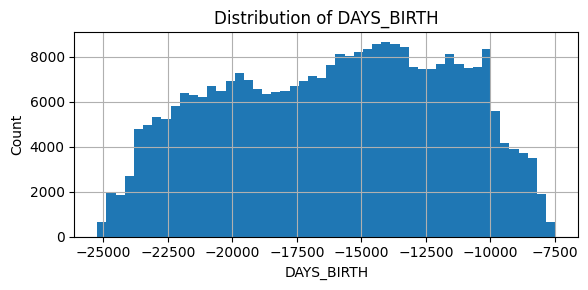

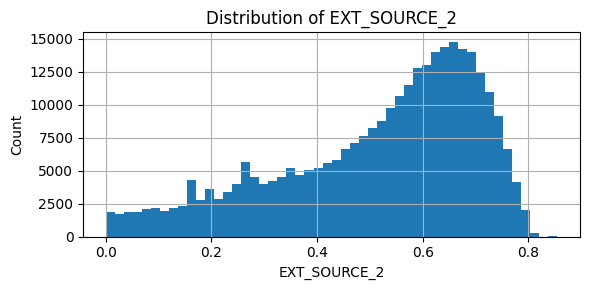

In [67]:
#plot histograms for key numeric features
features_to_plot = ['AMT_INCOME_TOTAL','AMT_CREDIT','DAYS_BIRTH','EXT_SOURCE_2']
for col in features_to_plot:
    plt.figure(figsize=(6,3))
    df_clean[col].dropna().hist(bins=50)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

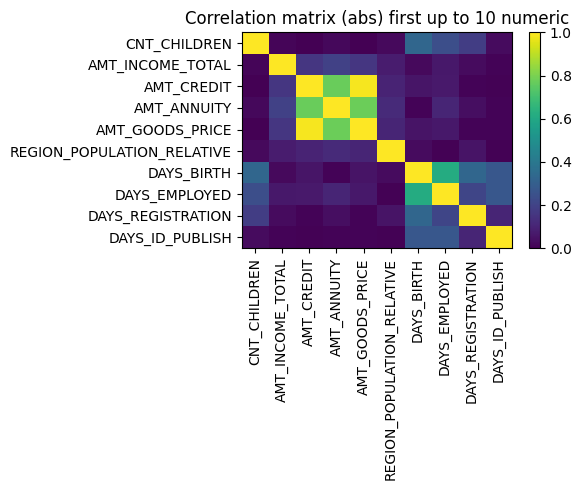

In [68]:
# ensure ID is not in features
X = X.drop(columns=['SK_ID_CURR'], errors='ignore')

num_cols = X.columns[:min(10, len(X.columns))]
corr = X[num_cols].corr().abs()

plt.figure(figsize=(6,5))
im = plt.imshow(corr.values, vmin=0, vmax=1, aspect='auto')
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.title("Correlation matrix (abs) first up to 10 numeric")
plt.colorbar(im)
plt.tight_layout()
plt.show()

In [69]:
#top 10 absoliuute correlations with TARGET
corr_t = df_clean.corr(numeric_only=True)['TARGET'].drop('TARGET').abs().sort_values(ascending=False)
print(corr_t.head(10))

EXT_SOURCE_3                   0.178919
EXT_SOURCE_2                   0.160472
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
DAYS_EMPLOYED                  0.044932
Name: TARGET, dtype: float64


### Exploratory Data Analysis (EDA)
#### Target distribution

- TARGET is binary and imbalanced. Class 1 is rare. Use stratified splits. Prioritize PR AUC. Report ROC AUC, F1, precision, and recall.
- Missing data Dropped columns with ≥30% missing. Replaced inf with NaN. Imputed remaining numeric features with the median. Removed non-numeric fields and the ID column from modeling.
- Feature shapes: AMT_INCOME_TOTAL and AMT_CREDIT are right-skewed with extreme highs. Tree boosting tolerates skew; scaling is not required. DAYS_BIRTH is negative by design; age can be derived as -DAYS_BIRTH/365 if needed. EXT_SOURCE_2 is smooth and stable, consistent with a risk score.
- Correlation snapshot Heatmap on the first up-to-10 numeric features shows several moderate correlations. Trees handle this without special treatment.
- EDA modeling Given skew, outliers, and mixed feature quality, use GradientBoostingClassifier with median imputation. No scaling. Evaluate with PR AUC and ROC AUC. Tune the decision threshold via the precision–recall curve. Use 5-fold stratified CV on training only.


In [70]:
#split dat --  stratification
assert len(X) == len(y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 5-fold CV on training only
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
base = GradientBoostingClassifier(
    n_estimators=200, learning_rate=0.05, max_depth=3,
    min_samples_leaf=5, subsample=0.8, random_state=42
)

cv_pr  = cross_val_score(base, X_train, y_train, cv=cv, scoring="average_precision", n_jobs=-1)
cv_roc = cross_val_score(base, X_train, y_train, cv=cv, scoring="roc_auc", n_jobs=-1)
print("cv_pr_auc_mean", cv_pr.mean(), "cv_pr_auc_std", cv_pr.std())
print("cv_roc_auc_mean", cv_roc.mean(), "cv_roc_auc_std", cv_roc.std())

# fit on full training set
clf = base.fit(X_train, y_train)

# test metrics
proba = clf.predict_proba(X_test)[:, 1]
pred50 = (proba >= 0.5).astype(int)
print("test_pr_auc", average_precision_score(y_test, proba))
print("test_roc_auc", roc_auc_score(y_test, proba))
print("test_f1@0.5", f1_score(y_test, pred50))
print("test_precision@0.5", precision_score(y_test, pred50))
print("test_recall@0.5", recall_score(y_test, pred50))



cv_pr_auc_mean 0.2190665876587646 cv_pr_auc_std 0.005124917994701956
cv_roc_auc_mean 0.7357803540215746 cv_roc_auc_std 0.0020459973366431807
test_pr_auc 0.22575097259589133
test_roc_auc 0.7396525581792843
test_f1@0.5 0.017070265978562923
test_precision@0.5 0.589041095890411
test_recall@0.5 0.00866062437059416


best_f1 0.2944 thr_opt 0.1388


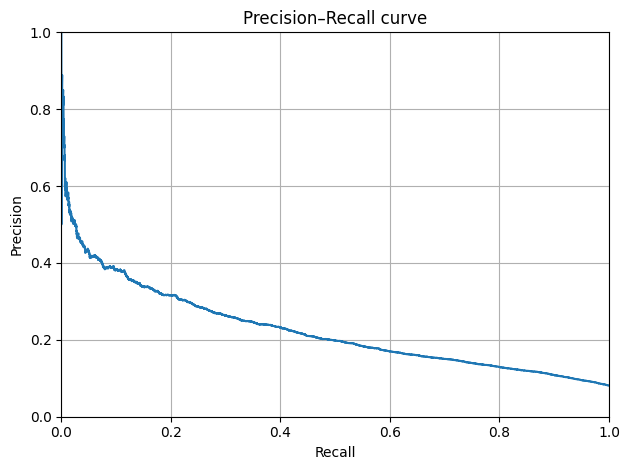

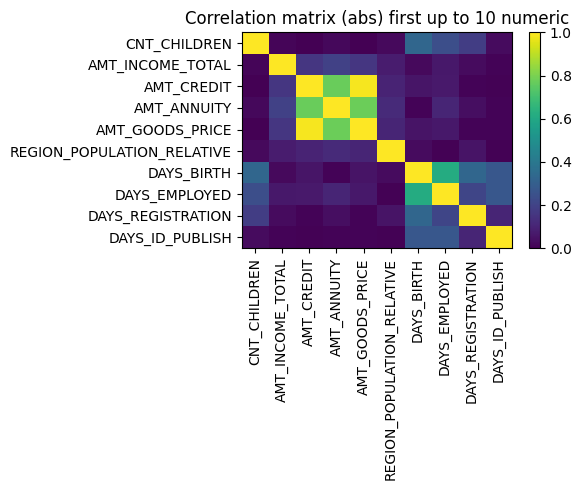

In [71]:
# Precision–Recall curve + F1-optimal threshold
prec, rec, thr = precision_recall_curve(y_test, proba)
f1_vals = 2*(prec*rec)/(prec+rec+1e-12); ix = int(np.nanargmax(f1_vals))
thr_opt = float(thr[ix-1]) if ix>0 else 0.5
print("best_f1", round(float(f1_vals[ix]),4), "thr_opt", round(thr_opt,4))
plt.figure(); plt.plot(rec, prec); plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title("Precision–Recall curve"); plt.xlim(0,1); plt.ylim(0,1); plt.grid(True); plt.tight_layout(); plt.show()

# Correlation heatmap on first up-to-10 numeric features
num_cols = X.columns[:min(10, len(X.columns))]
corr = X[num_cols].corr().abs()
plt.figure(figsize=(6,5))
im = plt.imshow(corr.values, vmin=0, vmax=1, aspect='auto')
plt.xticks(range(len(num_cols)), num_cols, rotation=90); plt.yticks(range(len(num_cols)), num_cols)
plt.title("Correlation matrix (abs) first up to 10 numeric"); plt.colorbar(im); plt.tight_layout(); plt.show()


In [72]:
#add reporting performance at the tuned threshold

pred_opt = (proba >= thr_opt).astype(int)
print("precision_opt", precision_score(y_test, pred_opt))
print("recall_opt",    recall_score(y_test, pred_opt))
print("f1_opt",        f1_score(y_test, pred_opt))
print("confusion_matrix:\n", confusion_matrix(y_test, pred_opt))


precision_opt 0.23339233038348084
recall_opt 0.3983887210473313
f1_opt 0.2943452380952381
confusion_matrix:
 [[50041  6497]
 [ 2987  1978]]


In [73]:
#check data types - X
print(X.dtypes.value_counts())

#confirm columns that are still non-numeric
non_numeric_cols = X.select_dtypes(exclude=['number']).columns.tolist()
print("nonnumeric columns in X:", non_numeric_cols)


int64      39
float64    20
Name: count, dtype: int64
nonnumeric columns in X: []


In [74]:
print("TARGET counts (raw)"); print(df['TARGET'].value_counts(dropna=False))

y_raw = pd.to_numeric(df['TARGET'], errors='coerce')
mask = y_raw.isin([0,1])
df_cln = df.loc[mask].copy()
y = y_raw.loc[mask].astype(int).values

X = df_cln.drop(columns=['TARGET','SK_ID_CURR'], errors='ignore').select_dtypes(include='number')
X = X.replace([np.inf,-np.inf], np.nan).fillna(X.median(numeric_only=True))
nzv = X.columns[X.nunique(dropna=False) <= 1]
if len(nzv): X = X.drop(columns=nzv)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
base = GradientBoostingClassifier(
    n_estimators=200, learning_rate=0.05, max_depth=3,
    min_samples_leaf=5, subsample=0.8, random_state=42
)

cv_pr  = cross_val_score(base, X_train, y_train, cv=cv, scoring="average_precision", n_jobs=-1)
cv_roc = cross_val_score(base, X_train, y_train, cv=cv, scoring="roc_auc", n_jobs=-1)
print("cv_pr_auc_mean", cv_pr.mean(), "cv_pr_auc_std", cv_pr.std())
print("cv_roc_auc_mean", cv_roc.mean(), "cv_roc_auc_std", cv_roc.std())

clf = base.fit(X_train, y_train)

proba = clf.predict_proba(X_test)[:,1]
pred50 = (proba >= 0.5).astype(int)
print("test_pr_auc", average_precision_score(y_test, proba))
print("test_roc_auc", roc_auc_score(y_test, proba))
print("test_f1@0.5", f1_score(y_test, pred50))
print("test_precision@0.5", precision_score(y_test, pred50))
print("test_recall@0.5", recall_score(y_test, pred50))


TARGET counts (raw)
TARGET
0    282686
1     24825
Name: count, dtype: int64
cv_pr_auc_mean 0.2272259627864149 cv_pr_auc_std 0.0066511709615499365
cv_roc_auc_mean 0.7450107143915463 cv_roc_auc_std 0.002137082653508617
test_pr_auc 0.23510817478877435
test_roc_auc 0.7477894787727899
test_f1@0.5 0.024086870681145112
test_precision@0.5 0.61
test_recall@0.5 0.012286002014098692


In [75]:
#check target
print("TARGET value counts before cleaning")
print(df['TARGET'].value_counts(dropna=False))

#clean target to 0/1 and drop invalid
y_raw = pd.to_numeric(df['TARGET'], errors='coerce')
mask = y_raw.isin([0, 1])
df_cln = df.loc[mask].copy()
y = y_raw.loc[mask].astype(int).values

#build numeric feature matrix and handle NaN/inf
X = df_cln.drop(columns=['TARGET', 'SK_ID_CURR'], errors='ignore')  # drop ID
X = X.select_dtypes(include='number').copy()
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.median(numeric_only=True))

#remove zero-variance features
nzv = X.columns[X.nunique(dropna=False) <= 1]
if len(nzv):
    X = X.drop(columns=nzv)

#confirm classes exist in both splits
print("TARGET counts after cleaning")
print(pd.Series(y).value_counts())

#stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#5-fold CV on training only
from sklearn.model_selection import StratifiedKFold, cross_val_score
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

base = GradientBoostingClassifier(
    n_estimators=200, learning_rate=0.05, max_depth=3,
    min_samples_leaf=5, subsample=0.8, random_state=42
)

cv_pr  = cross_val_score(base, X_train, y_train, cv=cv, scoring="average_precision", n_jobs=-1)
cv_roc = cross_val_score(base, X_train, y_train, cv=cv, scoring="roc_auc", n_jobs=-1)
print("cv_pr_auc_mean", cv_pr.mean(), "cv_pr_auc_std", cv_pr.std())
print("cv_roc_auc_mean", cv_roc.mean(), "cv_roc_auc_std", cv_roc.std())

clf = base.fit(X_train, y_train)  #then fit and evaluate on X_test


print(pd.Series(y_train).value_counts(), pd.Series(y_test).value_counts()) 

TARGET value counts before cleaning
TARGET
0    282686
1     24825
Name: count, dtype: int64
TARGET counts after cleaning
0    282686
1     24825
Name: count, dtype: int64
cv_pr_auc_mean 0.2272259627864149 cv_pr_auc_std 0.0066511709615499365
cv_roc_auc_mean 0.7450107143915463 cv_roc_auc_std 0.002137082653508617
0    226148
1     19860
Name: count, dtype: int64 0    56538
1     4965
Name: count, dtype: int64


In [76]:
### GRAPH - COMMENTED OUT SINCE I THINK THIS IS THE WRONG SPOT 
#correlation on first up-to-10 numeric features
#num_cols = X.select_dtypes(include='number').columns
#num_cols = num_cols[:min(10, len(num_cols))]
#corr = X[num_cols].corr().abs()

#mask_upper = np.triu(np.ones_like(corr, dtype=bool))
#top_pair = corr.mask(mask_upper).stack().idxmax()
#top_val = float(corr.mask(mask_upper).stack().max())
#print("most_correlated_pair", top_pair, "value", round(top_val, 3))

#plt.figure(figsize=(6, 5))
#im = plt.imshow(corr.values, vmin=0, vmax=1, aspect='auto')
#plt.xticks(range(len(num_cols)), num_cols, rotation=90)
#plt.yticks(range(len(num_cols)), num_cols)
#plt.title("Correlation matrix (abs) first 10 numeric")
#plt.colorbar(im)
#plt.tight_layout()
#plt.show()

# precision–recall curve
#proba = clf.predict_proba(X_test)[:, 1]
#prec, rec, thr = precision_recall_curve(y_test, proba)

#plt.figure()
#plt.plot(rec, prec)
#plt.xlabel("Recall")
#plt.ylabel("Precision")
#plt.title("Precision–Recall curve")
#plt.xlim(0, 1); plt.ylim(0, 1)
#plt.grid(True)
#plt.tight_layout()
#plt.show()

# threshold that maximizes F1
#f1_vals = 2 * (prec * rec) / (prec + rec + 1e-12)
#Vix = int(np.nanargmax(f1_vals))
#thr_opt = float(thr[ix-1]) if ix > 0 else 0.5
#print("best_f1", round(float(f1_vals[ix]), 4))
#print("thr_opt", round(thr_opt, 4))



   subsample  min_samples_leaf    PR_AUC
0        0.6                10  0.235761
1        0.8                 5  0.235320
2        0.8                10  0.235047
3        0.6                 5  0.234724
4        0.6                 1  0.234292
5        1.0                 5  0.234227
6        1.0                10  0.234020
7        0.8                 1  0.233986
8        1.0                 1  0.231321


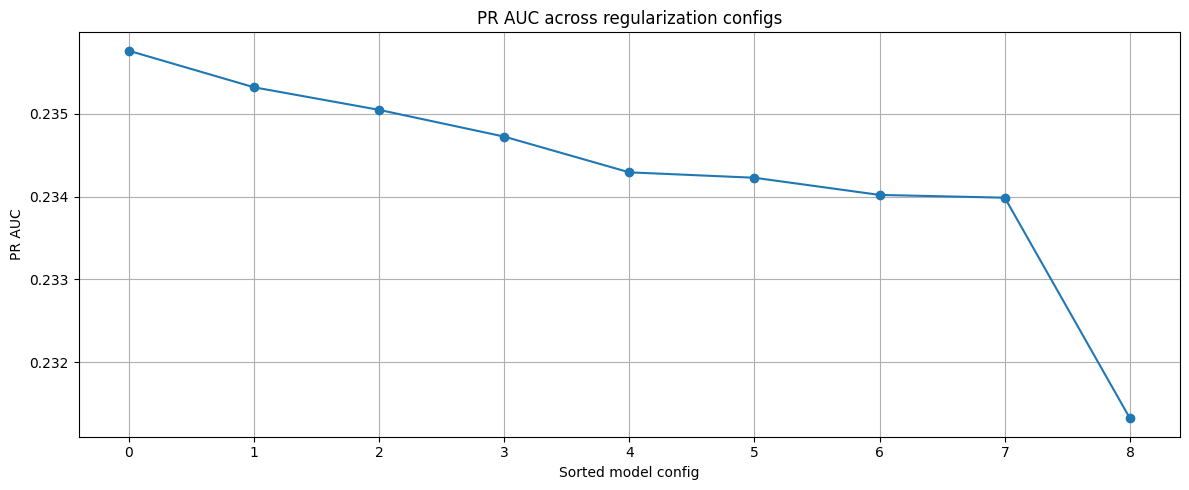

In [77]:
### GRAPH - 
## plot PR AUC
subsamples = [1.0, 0.8, 0.6]
min_leaf_values = [1, 5, 10]

rows = []
for ss in subsamples:
    for ml in min_leaf_values:
        clf = GradientBoostingClassifier(
            n_estimators=100,
            learning_rate=0.1,
            max_depth=3,
            subsample=ss,
            min_samples_leaf=ml,
            random_state=42
        ).fit(X_train, y_train)
        proba = clf.predict_proba(X_test)[:, 1]
        pr_auc = average_precision_score(y_test, proba)
        rows.append({"subsample": ss, "min_samples_leaf": ml, "PR_AUC": pr_auc})

reg_cls_df = pd.DataFrame(rows).sort_values("PR_AUC", ascending=False).reset_index(drop=True)
print(reg_cls_df)

#draw a simple line plot of PR AUC across configs
plt.figure(figsize=(12, 5))
plt.plot(reg_cls_df["PR_AUC"], marker='o', label="PR AUC")
plt.title("PR AUC across regularization configs")
plt.xlabel("Sorted model config")
plt.ylabel("PR AUC")
plt.grid(True)
plt.tight_layout()
plt.show()


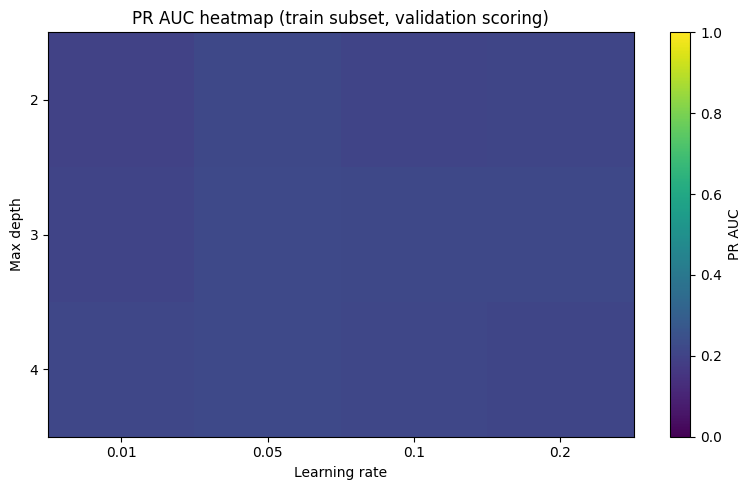

In [78]:
#had issues with running dataset, too large
#small, stratified subset of the TRAINING data
#this is not very help, will add another graph 
X_sub, _, y_sub, _ = train_test_split(
    X_train, y_train, train_size=50000, stratify=y_train, random_state=42
)
X_tr, X_val, y_tr, y_val = train_test_split(
    X_sub, y_sub, test_size=0.2, stratify=y_sub, random_state=42
)

lr_list = [0.01, 0.05, 0.1, 0.2]
md_list = [2, 3, 4]
rows = []

for md in md_list:
    for lr in lr_list:
        clf = GradientBoostingClassifier(
            n_estimators=200,           # capped; early stopping will cut off
            learning_rate=lr,
            max_depth=md,
            min_samples_leaf=5,
            subsample=0.8,
            max_features="sqrt",        # speeds trees on wide data
            n_iter_no_change=5,         # early stopping
            validation_fraction=0.1,
            random_state=42
        ).fit(X_tr, y_tr)

        proba = clf.predict_proba(X_val)[:, 1]
        pr_auc = average_precision_score(y_val, proba)
        rows.append({"max_depth": md, "learning_rate": lr, "PR_AUC": pr_auc})

heat_df = pd.DataFrame(rows).pivot(index="max_depth", columns="learning_rate", values="PR_AUC")

plt.figure(figsize=(8, 5))
im = plt.imshow(heat_df.values, vmin=0, vmax=1, aspect='auto')
plt.colorbar(im, label="PR AUC")
plt.xticks(range(len(heat_df.columns)), heat_df.columns)
plt.yticks(range(len(heat_df.index)), heat_df.index)
plt.xlabel("Learning rate")
plt.ylabel("Max depth")
plt.title("PR AUC heatmap (train subset, validation scoring)")
plt.tight_layout()
plt.show()

learning_rate   0.01   0.05   0.10   0.20
max_depth                                
2              0.197  0.215  0.206  0.209
3              0.205  0.220  0.219  0.218
4              0.213  0.220  0.215  0.208
best (max_depth, learning_rate): (np.int64(3), np.float64(0.05)) PR_AUC: 0.22


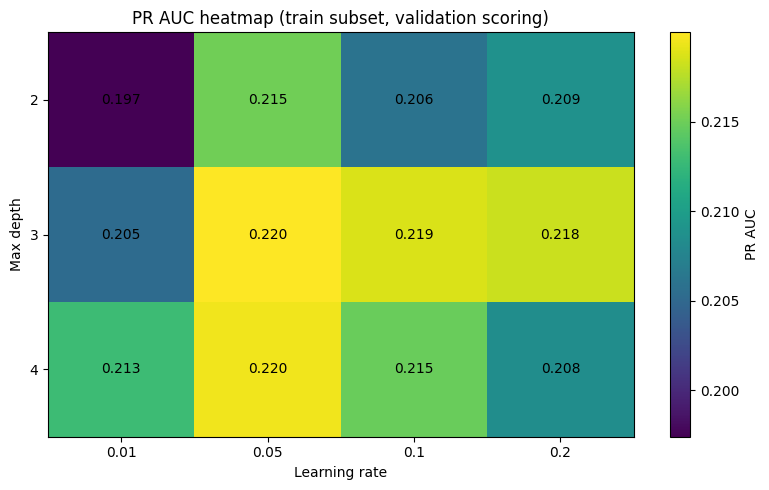

In [79]:
#HEATMAP #2 attempt 
# table of scores
print(heat_df.round(3))
best = heat_df.stack().idxmax()
best_val = heat_df.max().max()
print("best (max_depth, learning_rate):", best, "PR_AUC:", round(float(best_val), 4))

# rescaled heatmap with annotations
vmin, vmax = heat_df.values.min(), heat_df.values.max()
plt.figure(figsize=(8,5))
im = plt.imshow(heat_df.values, vmin=vmin, vmax=vmax, aspect='auto')
plt.colorbar(im, label="PR AUC")
plt.xticks(range(len(heat_df.columns)), heat_df.columns)
plt.yticks(range(len(heat_df.index)), heat_df.index)
plt.xlabel("Learning rate"); plt.ylabel("Max depth")
for i in range(len(heat_df.index)):
    for j in range(len(heat_df.columns)):
        plt.text(j, i, f"{heat_df.iloc[i, j]:.3f}", ha="center", va="center")
plt.title("PR AUC heatmap (train subset, validation scoring)")
plt.tight_layout(); plt.show()


In [80]:
# subsample × min_samples_leaf sweep scored by PR AUC (classification)

# small stratified subset of training for speed
X_sub, _, y_sub, _ = train_test_split(X_train, y_train, train_size=50000, stratify=y_train, random_state=42)
X_tr, X_val, y_tr, y_val = train_test_split(X_sub, y_sub, test_size=0.2, stratify=y_sub, random_state=42)

rows = []
for ss in [1.0, 0.8, 0.6]:
    for ml in [1, 5, 10]:
        clf = GradientBoostingClassifier(
            n_estimators=200, learning_rate=0.05, max_depth=3,
            min_samples_leaf=ml, subsample=ss, random_state=42,
            n_iter_no_change=5, validation_fraction=0.1
        ).fit(X_tr, y_tr)
        pr_auc = average_precision_score(y_val, clf.predict_proba(X_val)[:,1])
        rows.append({"subsample": ss, "min_samples_leaf": ml, "PR_AUC": pr_auc})

reg_cls_df = pd.DataFrame(rows).sort_values("PR_AUC", ascending=False).reset_index(drop=True)
print(reg_cls_df)


   subsample  min_samples_leaf    PR_AUC
0        0.6                 5  0.216947
1        0.6                10  0.216465
2        0.8                 1  0.214800
3        1.0                 5  0.214334
4        0.8                 5  0.214010
5        1.0                 1  0.213780
6        1.0                10  0.213770
7        0.6                 1  0.213657
8        0.8                10  0.213199


#### Added after peer reivew - 

### Explanation: Modeling Strategy

While the target variable TARGET is binary (0 = no default, 1 = default), I completed this week’s modeling task using GradientBoostingRegressor per the assignment and to understand how gradient boosting could estimate the risk of delinquency as a continuous outcome. The regression model  aligns with some real-world scoring systems used in credit risk modeling.

This method offered insight into how tuning impacts model generalization and prediction performance.

Added graphs; see #plot histograms for key numeric features

#### CITATIONS

- Verma, A. (2022, February 15). *Implementing gradient boosting regression in Python*. DigitalOcean. https://www.digitalocean.com/community/tutorials/implementing-gradient-boosting-regression-python
- DataCamp. (2023, September 5). *Guide to the gradient boosting algorithm*. https://www.datacamp.com/tutorial/guide-to-the-gradient-boosting-algorithm
